# Lab 9 Report

## Brain Tumor Project

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import torch
import cv2
import numpy as np
import tensorflow as tf


### Prepare Data

In [2]:
data = tf.keras.utils.image_dataset_from_directory('tumorimages/tumor_diagnosis/')

Found 3000 files belonging to 2 classes.


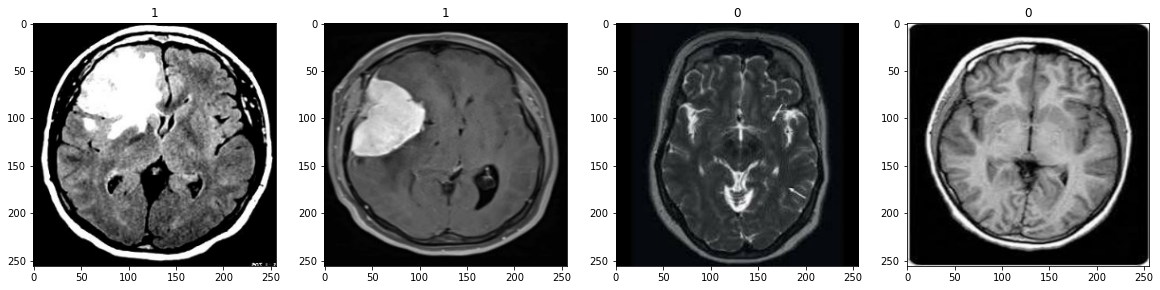

In [3]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [4]:
len(data)

94

In [5]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)


train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

## Define Model

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
'''
model = Sequential()
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

'''

model = Sequential([
  layers.Rescaling(1./255, input_shape=(256, 256, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(2)
])


### Train Model

In [7]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
hist = model.fit(
  train,
  validation_data=val,
  epochs=5
)

Epoch 1/5
65/65 [==============================] - 61s 919ms/step - loss: 0.6263 - accuracy: 0.7606 - val_loss: 0.3126 - val_accuracy: 0.8628
Epoch 2/5
65/65 [==============================] - 59s 911ms/step - loss: 0.2467 - accuracy: 0.8990 - val_loss: 0.2036 - val_accuracy: 0.9167
Epoch 3/5
65/65 [==============================] - 61s 936ms/step - loss: 0.1265 - accuracy: 0.9615 - val_loss: 0.1152 - val_accuracy: 0.9618
Epoch 4/5
65/65 [==============================] - 59s 906ms/step - loss: 0.0603 - accuracy: 0.9856 - val_loss: 0.0547 - val_accuracy: 0.9740
Epoch 5/5
65/65 [==============================] - 59s 905ms/step - loss: 0.0249 - accuracy: 0.9942 - val_loss: 0.1171 - val_accuracy: 0.9601


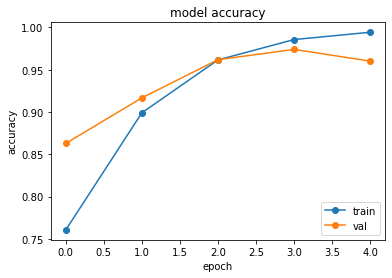

In [8]:
plt.plot(hist.history['accuracy'], marker='o')
plt.plot(hist.history['val_accuracy'], marker='o')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

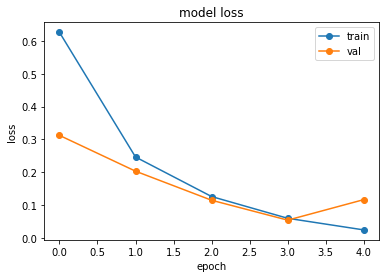

In [9]:
plt.plot(hist.history['loss'], marker='o')
plt.plot(hist.history['val_loss'], marker='o')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

### Test Against Fresh Images

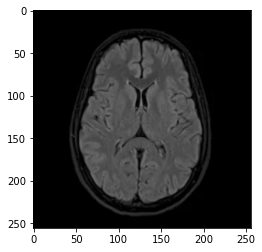

1/1 [==============================] - 0s 224ms/step
This image most likely belongs to Normal with a 98.26 percent confidence.


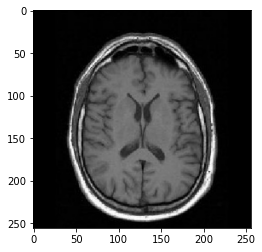

1/1 [==============================] - 0s 72ms/step
This image most likely belongs to Normal with a 100.00 percent confidence.


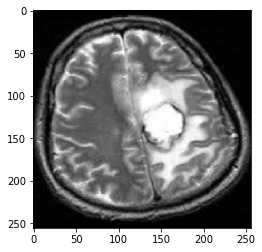

1/1 [==============================] - 0s 64ms/step
This image most likely belongs to Tumorous with a 74.22 percent confidence.


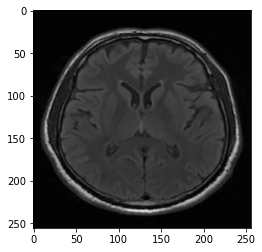

1/1 [==============================] - 0s 57ms/step
This image most likely belongs to Normal with a 92.32 percent confidence.


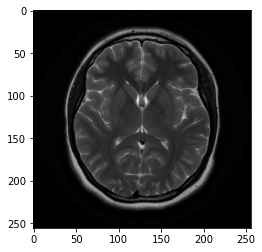

1/1 [==============================] - 0s 56ms/step
This image most likely belongs to Normal with a 100.00 percent confidence.


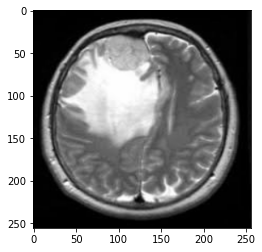

1/1 [==============================] - 0s 56ms/step
This image most likely belongs to Tumorous with a 97.98 percent confidence.


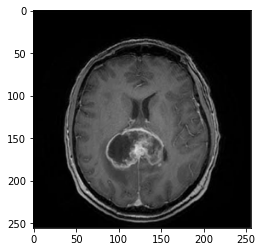

1/1 [==============================] - 0s 48ms/step
This image most likely belongs to Tumorous with a 96.29 percent confidence.


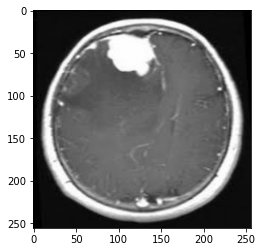

1/1 [==============================] - 0s 56ms/step
This image most likely belongs to Tumorous with a 99.84 percent confidence.


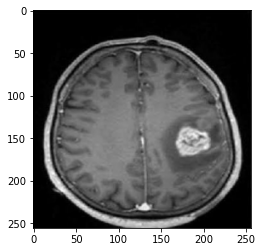

1/1 [==============================] - 0s 56ms/step
This image most likely belongs to Normal with a 91.75 percent confidence.


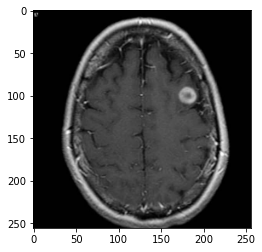

1/1 [==============================] - 0s 56ms/step
This image most likely belongs to Tumorous with a 69.86 percent confidence.


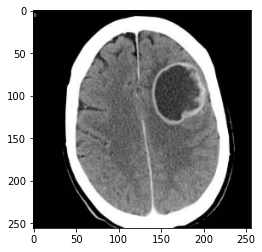

1/1 [==============================] - 0s 56ms/step
This image most likely belongs to Tumorous with a 64.31 percent confidence.


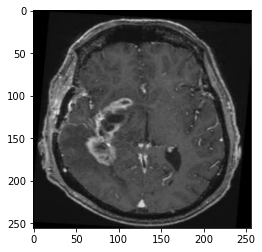

1/1 [==============================] - 0s 56ms/step
This image most likely belongs to Tumorous with a 92.79 percent confidence.


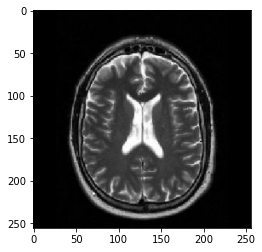

1/1 [==============================] - 0s 48ms/step
This image most likely belongs to Normal with a 99.98 percent confidence.


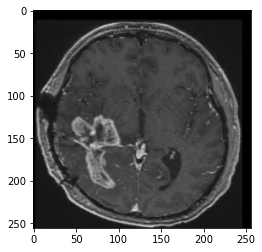

1/1 [==============================] - 0s 48ms/step
This image most likely belongs to Tumorous with a 98.46 percent confidence.


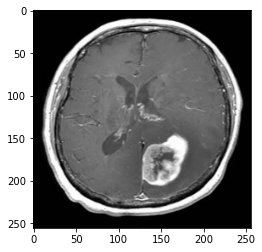

1/1 [==============================] - 0s 56ms/step
This image most likely belongs to Tumorous with a 99.98 percent confidence.


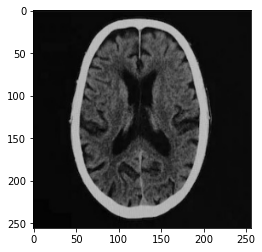

1/1 [==============================] - 0s 56ms/step
This image most likely belongs to Normal with a 99.92 percent confidence.


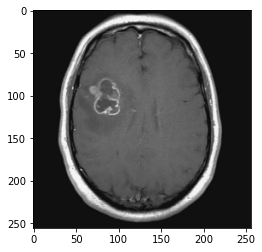

1/1 [==============================] - 0s 48ms/step
This image most likely belongs to Tumorous with a 84.03 percent confidence.


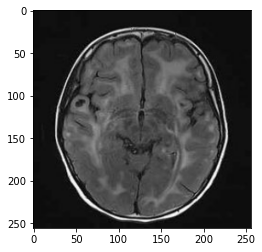

1/1 [==============================] - 0s 56ms/step
This image most likely belongs to Normal with a 99.85 percent confidence.


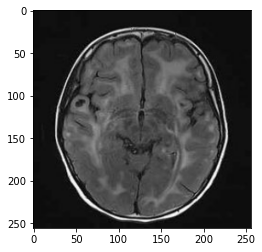

1/1 [==============================] - 0s 56ms/step
This image most likely belongs to Normal with a 99.85 percent confidence.


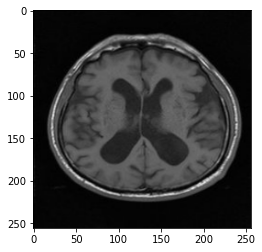

1/1 [==============================] - 0s 48ms/step
This image most likely belongs to Normal with a 97.85 percent confidence.


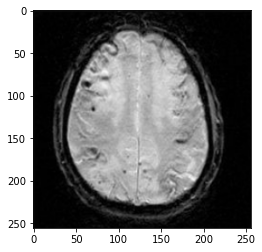

1/1 [==============================] - 0s 48ms/step
This image most likely belongs to Normal with a 97.38 percent confidence.


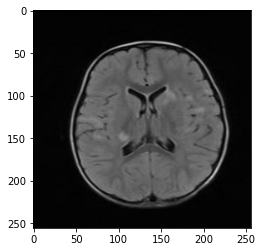

1/1 [==============================] - 0s 56ms/step
This image most likely belongs to Normal with a 99.44 percent confidence.


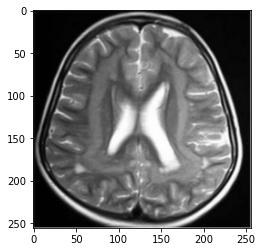

1/1 [==============================] - 0s 56ms/step
This image most likely belongs to Normal with a 98.27 percent confidence.


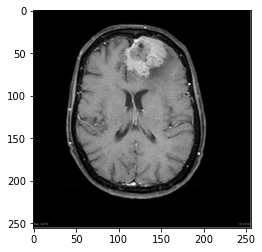

1/1 [==============================] - 0s 49ms/step
This image most likely belongs to Tumorous with a 92.31 percent confidence.


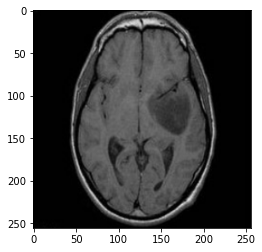

1/1 [==============================] - 0s 48ms/step
This image most likely belongs to Normal with a 99.99 percent confidence.


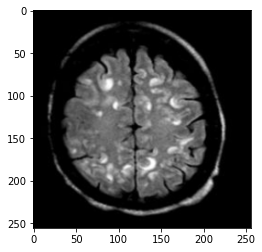

1/1 [==============================] - 0s 40ms/step
This image most likely belongs to Tumorous with a 59.10 percent confidence.


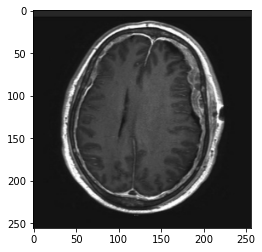

1/1 [==============================] - 0s 40ms/step
This image most likely belongs to Tumorous with a 81.11 percent confidence.


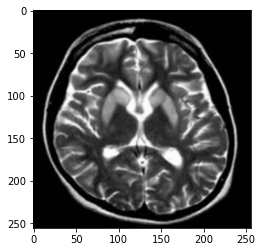

1/1 [==============================] - 0s 40ms/step
This image most likely belongs to Tumorous with a 88.51 percent confidence.


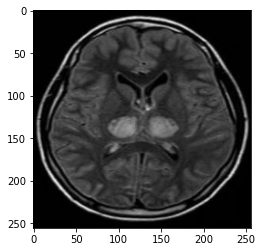

1/1 [==============================] - 0s 40ms/step
This image most likely belongs to Tumorous with a 99.72 percent confidence.


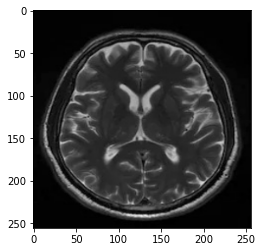

1/1 [==============================] - 0s 48ms/step
This image most likely belongs to Normal with a 97.26 percent confidence.


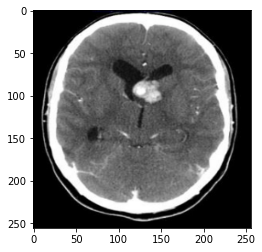

1/1 [==============================] - 0s 40ms/step
This image most likely belongs to Tumorous with a 68.50 percent confidence.


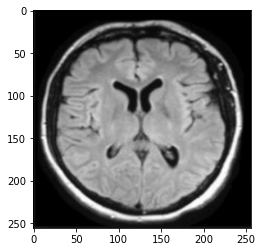

1/1 [==============================] - 0s 48ms/step
This image most likely belongs to Normal with a 99.94 percent confidence.


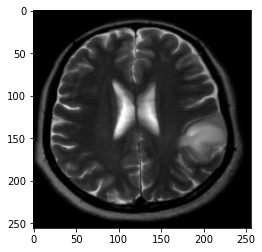

1/1 [==============================] - 0s 40ms/step
This image most likely belongs to Normal with a 99.64 percent confidence.


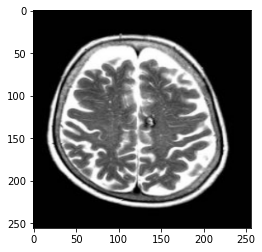

1/1 [==============================] - 0s 32ms/step
This image most likely belongs to Tumorous with a 86.65 percent confidence.


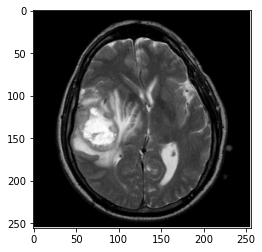

1/1 [==============================] - 0s 40ms/step
This image most likely belongs to Tumorous with a 88.08 percent confidence.


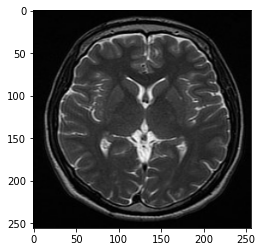

1/1 [==============================] - 0s 32ms/step
This image most likely belongs to Normal with a 100.00 percent confidence.


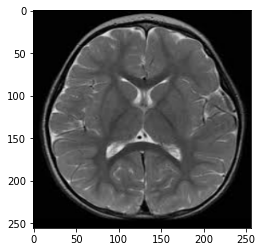

1/1 [==============================] - 0s 40ms/step
This image most likely belongs to Normal with a 99.57 percent confidence.


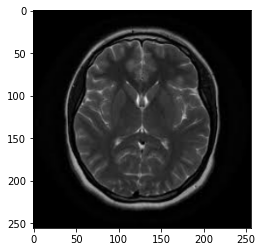

1/1 [==============================] - 0s 40ms/step
This image most likely belongs to Normal with a 100.00 percent confidence.


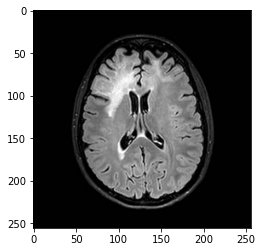

1/1 [==============================] - 0s 40ms/step
This image most likely belongs to Normal with a 100.00 percent confidence.


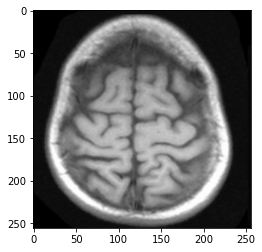

1/1 [==============================] - 0s 32ms/step
This image most likely belongs to Normal with a 76.57 percent confidence.


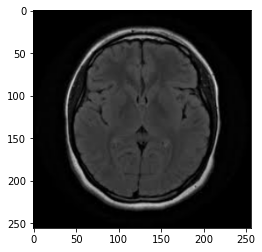

1/1 [==============================] - 0s 40ms/step
This image most likely belongs to Normal with a 100.00 percent confidence.


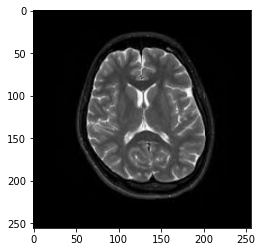

1/1 [==============================] - 0s 40ms/step
This image most likely belongs to Normal with a 100.00 percent confidence.


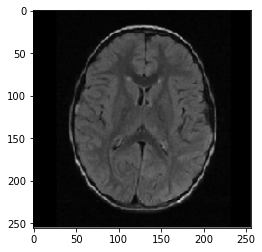

1/1 [==============================] - 0s 40ms/step
This image most likely belongs to Normal with a 100.00 percent confidence.


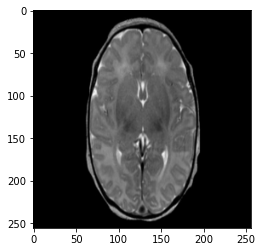

1/1 [==============================] - 0s 40ms/step
This image most likely belongs to Normal with a 100.00 percent confidence.


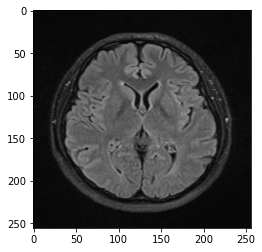

1/1 [==============================] - 0s 32ms/step
This image most likely belongs to Normal with a 99.70 percent confidence.


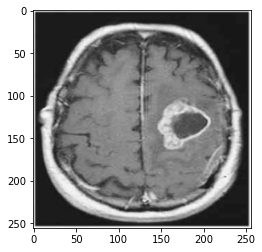

1/1 [==============================] - 0s 40ms/step
This image most likely belongs to Tumorous with a 99.94 percent confidence.


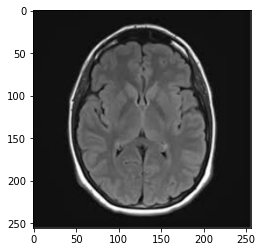

1/1 [==============================] - 0s 40ms/step
This image most likely belongs to Normal with a 100.00 percent confidence.


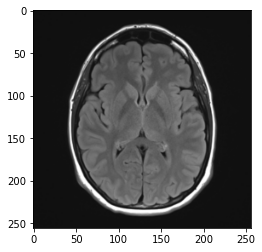

1/1 [==============================] - 0s 40ms/step
This image most likely belongs to Normal with a 100.00 percent confidence.


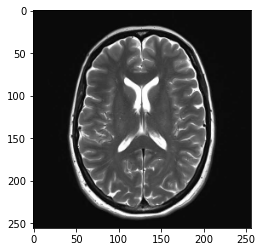

1/1 [==============================] - 0s 40ms/step
This image most likely belongs to Normal with a 100.00 percent confidence.


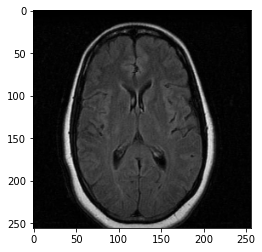

1/1 [==============================] - 0s 40ms/step
This image most likely belongs to Normal with a 100.00 percent confidence.


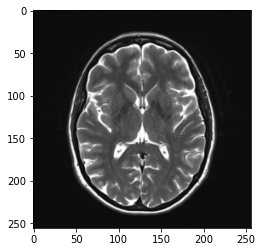

1/1 [==============================] - 0s 32ms/step
This image most likely belongs to Normal with a 100.00 percent confidence.


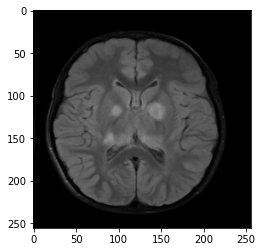

1/1 [==============================] - 0s 40ms/step
This image most likely belongs to Normal with a 62.80 percent confidence.


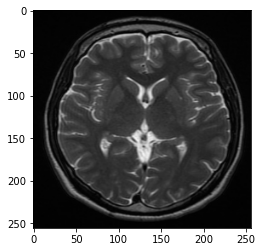

1/1 [==============================] - 0s 40ms/step
This image most likely belongs to Normal with a 100.00 percent confidence.


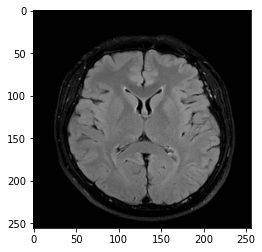

1/1 [==============================] - 0s 48ms/step
This image most likely belongs to Normal with a 99.74 percent confidence.


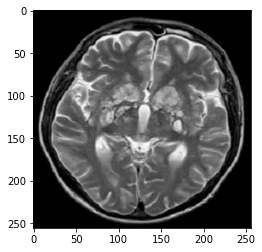

1/1 [==============================] - 0s 40ms/step
This image most likely belongs to Normal with a 94.69 percent confidence.


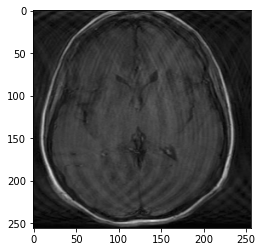

1/1 [==============================] - 0s 40ms/step
This image most likely belongs to Tumorous with a 60.03 percent confidence.


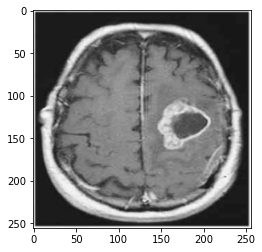

1/1 [==============================] - 0s 40ms/step
This image most likely belongs to Tumorous with a 99.94 percent confidence.


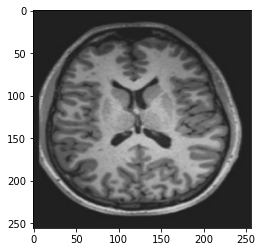

1/1 [==============================] - 0s 40ms/step
This image most likely belongs to Normal with a 90.25 percent confidence.


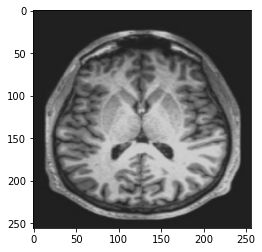

1/1 [==============================] - 0s 32ms/step
This image most likely belongs to Normal with a 97.91 percent confidence.


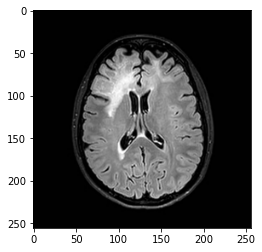

1/1 [==============================] - 0s 40ms/step
This image most likely belongs to Normal with a 100.00 percent confidence.


In [10]:
class_names = ['Normal', 'Tumorous']

for x in range(60):
    impath = 'tumorimages/test/pred' + str(x) + '.jpg'
    img = cv2.imread(impath)
    resize = tf.image.resize(img, (256, 256))
    plt.imshow(resize.numpy().astype(int))
    plt.show()

    predictions = model.predict(np.expand_dims(resize, 0))
    score = tf.nn.softmax(predictions[0])
    print("This image most likely belongs to {} with a {:.2f} percent confidence.".format(class_names[np.argmax(score)], 100 * np.max(score)))